In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [13]:
# Import data, set col and years lists

co2 = pd.read_csv("co2_emissions_tonnes_per_person.csv")
coal = pd.read_csv("eg_elc_coal_zs.csv")
gap = px.data.gapminder()
pop = pd.read_csv('population_total.csv')
gdp = pd.read_csv('gdppercapita_us_inflation_adjusted.csv')
col = ['country','1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003']
years = ['1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003']

In [14]:
# Filter the data by year, remove NA data

co2_75_03 = co2.loc[:, co2.columns.isin(col)].dropna(how='any')
coal_75_03 = coal.loc[:, coal.columns.isin(col)].dropna(how='any')
gdp_75_03 = gdp.loc[:, gdp.columns.isin(col)].dropna(how='any')
pop_75_03 = pop.loc[:, pop.columns.isin(col)].dropna(how='any')

In [15]:
# Melt the data by year, convert year column to type int

co2_75_03_melt = pd.melt(co2_75_03, id_vars='country', value_vars=years, var_name='year', value_name='co2_emission').sort_values('country')
co2_75_03_melt['year'] = co2_75_03_melt['year'].astype(int)

coal_75_03_melt = pd.melt(coal_75_03, id_vars='country', value_vars=years, var_name='year', value_name='ec_coal').sort_values('country')
coal_75_03_melt['year'] = coal_75_03_melt['year'].astype(int)

gdp_75_03_melt = pd.melt(gdp_75_03, id_vars='country', value_vars=years, var_name='year', value_name='gdp_pc').sort_values('country')
gdp_75_03_melt['year'] = gdp_75_03_melt['year'].astype(int)

pop_75_03_melt = pd.melt(pop_75_03, id_vars='country', value_vars=years, var_name='year', value_name='pop').sort_values('country')
pop_75_03_melt['year'] = pop_75_03_melt['year'].astype(int)
pop_75_03_melt

country  year       pop
0     Afghanistan  1975  12700000
3120  Afghanistan  1991  13300000
4485  Afghanistan  1998  19700000
1170  Afghanistan  1981  13200000
3900  Afghanistan  1995  18100000
...           ...   ...       ...
3509     Zimbabwe  1992  10900000
2144     Zimbabwe  1985   8880000
2924     Zimbabwe  1989  10200000
2534     Zimbabwe  1987   9530000
5654     Zimbabwe  2003  12000000

[5655 rows x 3 columns]

In [16]:
# Merge the final dataset

gdp_co2 = pd.merge(gdp_75_03_melt, co2_75_03_melt, how='left', left_on=['country','year'], right_on=['country','year'])
gdp_co2_coal = pd.merge(gdp_co2, coal_75_03_melt, how='left', left_on=['country','year'], right_on=['country','year'])
gdp_co2_coal_pop = pd.merge(gdp_co2_coal, pop_75_03_melt, how='left', left_on=['country','year'], right_on=['country','year'])
gdp_co2_coal_pop = gdp_co2_coal_pop.dropna(how='any')
gdp_co2_coal_pop.columns

Index(['country', 'year', 'gdp_pc', 'co2_emission', 'ec_coal', 'pop'], dtype='object')

In [17]:
final_df = pd.merge(gdp_co2_coal_pop, gap, how='left', left_on=['country'], right_on=['country'])
final_df.columns
final_df = final_df.dropna(how='any')
final_df.head()

country  year_x  gdp_pc  co2_emission  ec_coal     pop_x continent  year_y  \
0  Algeria    1975  3120.0          1.93      0.0  16600000    Africa  1952.0   
1  Algeria    1975  3120.0          1.93      0.0  16600000    Africa  1957.0   
2  Algeria    1975  3120.0          1.93      0.0  16600000    Africa  1962.0   
3  Algeria    1975  3120.0          1.93      0.0  16600000    Africa  1967.0   
4  Algeria    1975  3120.0          1.93      0.0  16600000    Africa  1972.0   

   lifeExp       pop_y    gdpPercap iso_alpha  iso_num  
0   43.077   9279525.0  2449.008185       DZA     12.0  
1   45.685  10270856.0  3013.976023       DZA     12.0  
2   48.303  11000948.0  2550.816880       DZA     12.0  
3   51.407  12760499.0  3246.991771       DZA     12.0  
4   54.518  14760787.0  4182.663766       DZA     12.0

In [18]:
final_df['co2_total'] = final_df['co2_emission'] * final_df['pop_x']
final_df = final_df.sort_values(['country','year_x'])
final_df.set_index('year_x')
print(final_df['year_x'].unique())

[1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003]


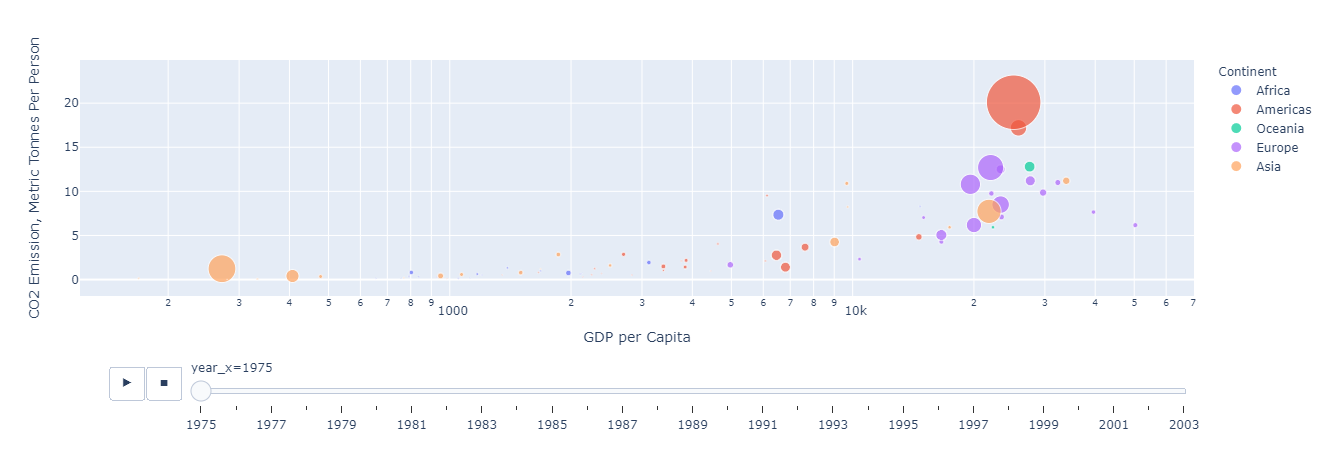

In [19]:
# Graph the data

labels={'gdp_pc':'GDP per Capita',
        'co2_emission':'CO2 Emission, Metric Tonnes Per Person',
        'co2_total':'Total CO2 Emission, Metric Tonnes',
        'year':'Year',
        'continent':'Continent'}
px.scatter(final_df, x="gdp_pc", y="co2_emission", animation_frame="year_x", animation_group="country",
           size="co2_total", color="continent", hover_name="country", 
           log_x = True, 
           size_max=45, labels=labels)